In [1]:
import pandas as pd
import numpy as np
import datetime


In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

#train = train[train.time_exit<57600][train.time_exit>54000]

#test =test[test.time_exit<57600][test.time_exit>54000]
    
train = train.append(test[test.x_exit==test.x_exit])
cols=['hash','trajectory_id','x_exit','y_exit',
      'distance_to_city'
     ]   
x_train = train.drop(columns=cols)
x_test = test2.drop(columns=cols)



y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983684 entries, 0 to 983683
Data columns (total 1 columns):
y    983684 non-null int64
dtypes: int64(1)
memory usage: 7.5 MB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 28 columns):
hash                983684 non-null object
trajectory_id       983684 non-null object
time_entry          983684 non-null int64
time_exit           983684 non-null int64
vmax                983684 non-null float64
vmin                983684 non-null float64
vmean               983684 non-null float64
x_entry             983684 non-null float64
y_entry             983684 non-null float64
x_exit              983684 non-null float64
y_exit              983684 non-null float64
first               983684 non-null bool
last                983684 non-null bool
x_req               983684 non-null float64
y_req               983684 non-null float64
x_start             983684 non-null float64
y_start             983684 non-null float64
distance            983684 non-null float64
time_start          983684 non-null int64
time_delta          983684 non-null int64
time_total          98368

In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

_min_samples=40
_eps=190

columns=['x_entry','y_entry',
         #'distance_to_city',
        #'distance',
        # 'vmax','vmean','vmin',
        ]
data=train[columns]
trainend=np.shape(data)[0]
#data=data.append(test[columns])
#testend=np.shape(data)[0]
data=data.append(test2[columns])

c = DBSCAN(eps=_eps,min_samples=_min_samples,n_jobs=-1).fit_predict(data)
#c=MiniBatchKMeans(n_clusters=50,max_iter=100, batch_size=100,reassignment_ratio=0.2, verbose=True,random_state=5315).fit_predict(data)

labels=list(np.unique(c))
clusters=len(labels)
train_c=c[:trainend]
#test_c=c[trainend:testend]
test2_c=c[trainend:]
x_train['cluster']=train_c
x_test['cluster']=test2_c

clusters




1429

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


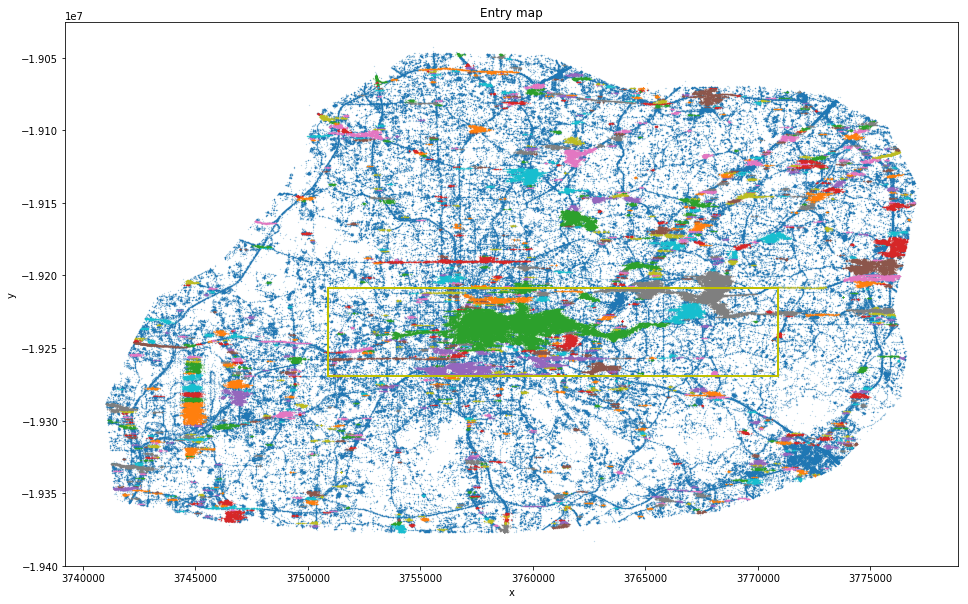

In [6]:
data=train[['x_entry','y_entry']]
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


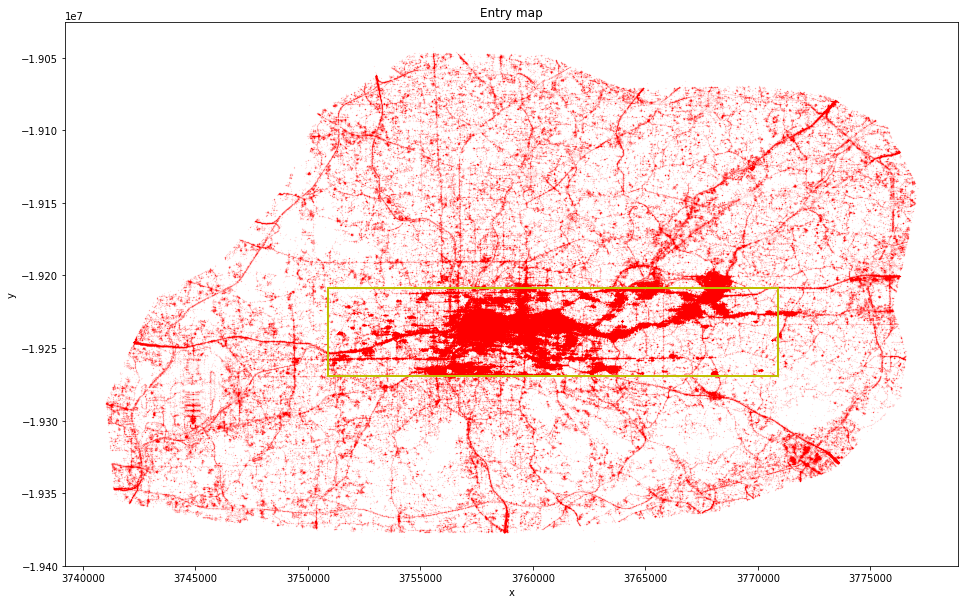

In [7]:

proba=[]
for c in labels:
    mean = np.mean(y_train[train_c==c].y)
    mean= mean #+ (0.2*(1-mean))
    proba.append(mean)
c_proba = pd.DataFrame({'c':labels,'proba':proba})



data=train[['x_entry','y_entry']]

#train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

D:\Anaconda\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[1]	valid's binary_logloss: 0.600913	valid's f1: 0
[2]	valid's binary_logloss: 0.59295	valid's f1: 0
[3]	valid's binary_logloss: 0.585199	valid's f1: 0
[4]	valid's binary_logloss: 0.577638	valid's f1: 0
[5]	valid's binary_logloss: 0.570269	valid's f1: 0
[6]	valid's binary_logloss: 0.563089	valid's f1: 0
[7]	valid's binary_logloss: 0.556073	valid's f1: 0
[8]	valid's binary_logloss: 0.54923	valid's f1: 0
[9]	valid's binary_logloss: 0.542546	valid's f1: 0
[10]	valid's binary_logloss: 0.536013	valid's f1: 0
[11]	valid's binary_logloss: 0.529623	valid's f1: 0
[12]	valid's binary_logloss: 0.523376	valid's f1: 0
[13]	valid's binary_logloss: 0.51727	valid's f1: 0
[14]	valid's binary_logloss: 0.511294	valid's f1: 0
[15]	valid's binary_logloss: 0.505444	valid's f1: 0
[16]	valid's binary_logloss: 0.499727	valid's f1: 0
[17]	valid's binary_logloss: 0.494122	valid's f1: 0
[18]	valid's binary_logloss: 0.488638	valid's f1: 0
[19]	valid's binary_logloss: 0.48325	valid's f1: 0
[20]	valid's binary_loglo

[144]	valid's binary_logloss: 0.194207	valid's f1: 0.916004
[145]	valid's binary_logloss: 0.193302	valid's f1: 0.916062
[146]	valid's binary_logloss: 0.19241	valid's f1: 0.916127
[147]	valid's binary_logloss: 0.191529	valid's f1: 0.916135
[148]	valid's binary_logloss: 0.190661	valid's f1: 0.9162
[149]	valid's binary_logloss: 0.1898	valid's f1: 0.916236
[150]	valid's binary_logloss: 0.188946	valid's f1: 0.916302
[151]	valid's binary_logloss: 0.188109	valid's f1: 0.916298
[152]	valid's binary_logloss: 0.187279	valid's f1: 0.916365
[153]	valid's binary_logloss: 0.186456	valid's f1: 0.916429
[154]	valid's binary_logloss: 0.18564	valid's f1: 0.916445
[155]	valid's binary_logloss: 0.184839	valid's f1: 0.916508
[156]	valid's binary_logloss: 0.184043	valid's f1: 0.916512
[157]	valid's binary_logloss: 0.183256	valid's f1: 0.916524
[158]	valid's binary_logloss: 0.182481	valid's f1: 0.916572
[159]	valid's binary_logloss: 0.181712	valid's f1: 0.916643
[160]	valid's binary_logloss: 0.180948	valid's

[282]	valid's binary_logloss: 0.129969	valid's f1: 0.918384
[283]	valid's binary_logloss: 0.12977	valid's f1: 0.918377
[284]	valid's binary_logloss: 0.129562	valid's f1: 0.918432
[285]	valid's binary_logloss: 0.129361	valid's f1: 0.918435
[286]	valid's binary_logloss: 0.129167	valid's f1: 0.918418
[287]	valid's binary_logloss: 0.128971	valid's f1: 0.918421
[288]	valid's binary_logloss: 0.128777	valid's f1: 0.918391
[289]	valid's binary_logloss: 0.128588	valid's f1: 0.918377
[290]	valid's binary_logloss: 0.128397	valid's f1: 0.918413
[291]	valid's binary_logloss: 0.12821	valid's f1: 0.918426
[292]	valid's binary_logloss: 0.128024	valid's f1: 0.918426
[293]	valid's binary_logloss: 0.127838	valid's f1: 0.918447
[294]	valid's binary_logloss: 0.127655	valid's f1: 0.918449
[295]	valid's binary_logloss: 0.127476	valid's f1: 0.918443
[296]	valid's binary_logloss: 0.127297	valid's f1: 0.918479
[297]	valid's binary_logloss: 0.127122	valid's f1: 0.918554
[298]	valid's binary_logloss: 0.126946	val

[419]	valid's binary_logloss: 0.114621	valid's f1: 0.919352
[420]	valid's binary_logloss: 0.114562	valid's f1: 0.919359
[421]	valid's binary_logloss: 0.114513	valid's f1: 0.91936
[422]	valid's binary_logloss: 0.114457	valid's f1: 0.919312
[423]	valid's binary_logloss: 0.114398	valid's f1: 0.919332
[424]	valid's binary_logloss: 0.11435	valid's f1: 0.919342
[425]	valid's binary_logloss: 0.114294	valid's f1: 0.919381
[426]	valid's binary_logloss: 0.114232	valid's f1: 0.91936
[427]	valid's binary_logloss: 0.114175	valid's f1: 0.919367
[428]	valid's binary_logloss: 0.114121	valid's f1: 0.919361
[429]	valid's binary_logloss: 0.114075	valid's f1: 0.919381
[430]	valid's binary_logloss: 0.11402	valid's f1: 0.91939
[431]	valid's binary_logloss: 0.113966	valid's f1: 0.919409
[432]	valid's binary_logloss: 0.11391	valid's f1: 0.919442
[433]	valid's binary_logloss: 0.113856	valid's f1: 0.919425
[434]	valid's binary_logloss: 0.113803	valid's f1: 0.91945
[435]	valid's binary_logloss: 0.11375	valid's f

[557]	valid's binary_logloss: 0.110073	valid's f1: 0.920127
[558]	valid's binary_logloss: 0.110062	valid's f1: 0.920098
[559]	valid's binary_logloss: 0.110047	valid's f1: 0.920071
[560]	valid's binary_logloss: 0.11003	valid's f1: 0.920087
[561]	valid's binary_logloss: 0.110016	valid's f1: 0.920054
[562]	valid's binary_logloss: 0.110001	valid's f1: 0.920045
[563]	valid's binary_logloss: 0.109984	valid's f1: 0.920054
[564]	valid's binary_logloss: 0.109971	valid's f1: 0.920046
[565]	valid's binary_logloss: 0.109959	valid's f1: 0.920013
[566]	valid's binary_logloss: 0.109937	valid's f1: 0.920047
[567]	valid's binary_logloss: 0.109921	valid's f1: 0.920047
[568]	valid's binary_logloss: 0.109914	valid's f1: 0.91998
[569]	valid's binary_logloss: 0.109889	valid's f1: 0.91997
[570]	valid's binary_logloss: 0.109877	valid's f1: 0.919953
[571]	valid's binary_logloss: 0.109862	valid's f1: 0.919953
[572]	valid's binary_logloss: 0.109841	valid's f1: 0.919972
[573]	valid's binary_logloss: 0.109828	vali

[694]	valid's binary_logloss: 0.108583	valid's f1: 0.920487
[695]	valid's binary_logloss: 0.108575	valid's f1: 0.920497
[696]	valid's binary_logloss: 0.108569	valid's f1: 0.920471
[697]	valid's binary_logloss: 0.108567	valid's f1: 0.920462
[698]	valid's binary_logloss: 0.108563	valid's f1: 0.920461
[699]	valid's binary_logloss: 0.108552	valid's f1: 0.920402
[700]	valid's binary_logloss: 0.108548	valid's f1: 0.920375
[701]	valid's binary_logloss: 0.108534	valid's f1: 0.920367
[702]	valid's binary_logloss: 0.108527	valid's f1: 0.920363
[703]	valid's binary_logloss: 0.108523	valid's f1: 0.920365
[704]	valid's binary_logloss: 0.108508	valid's f1: 0.920419
[705]	valid's binary_logloss: 0.108506	valid's f1: 0.920402
[706]	valid's binary_logloss: 0.108491	valid's f1: 0.92044
[707]	valid's binary_logloss: 0.108487	valid's f1: 0.92042
[708]	valid's binary_logloss: 0.108481	valid's f1: 0.920422
[709]	valid's binary_logloss: 0.108466	valid's f1: 0.920486
[710]	valid's binary_logloss: 0.10845	vali

[36]	valid's binary_logloss: 0.406613	valid's f1: 0.781548
[37]	valid's binary_logloss: 0.402735	valid's f1: 0.817097
[38]	valid's binary_logloss: 0.398913	valid's f1: 0.833756
[39]	valid's binary_logloss: 0.395168	valid's f1: 0.842869
[40]	valid's binary_logloss: 0.391477	valid's f1: 0.853717
[41]	valid's binary_logloss: 0.387855	valid's f1: 0.859338
[42]	valid's binary_logloss: 0.384285	valid's f1: 0.863435
[43]	valid's binary_logloss: 0.380777	valid's f1: 0.868426
[44]	valid's binary_logloss: 0.377328	valid's f1: 0.872393
[45]	valid's binary_logloss: 0.373931	valid's f1: 0.874839
[46]	valid's binary_logloss: 0.370586	valid's f1: 0.877687
[47]	valid's binary_logloss: 0.367298	valid's f1: 0.879908
[48]	valid's binary_logloss: 0.364058	valid's f1: 0.882243
[49]	valid's binary_logloss: 0.360869	valid's f1: 0.884554
[50]	valid's binary_logloss: 0.357734	valid's f1: 0.886855
[51]	valid's binary_logloss: 0.354645	valid's f1: 0.888329
[52]	valid's binary_logloss: 0.351603	valid's f1: 0.8897

[174]	valid's binary_logloss: 0.170798	valid's f1: 0.91847
[175]	valid's binary_logloss: 0.170158	valid's f1: 0.918444
[176]	valid's binary_logloss: 0.169523	valid's f1: 0.918494
[177]	valid's binary_logloss: 0.168894	valid's f1: 0.918482
[178]	valid's binary_logloss: 0.168276	valid's f1: 0.918504
[179]	valid's binary_logloss: 0.167659	valid's f1: 0.918548
[180]	valid's binary_logloss: 0.167054	valid's f1: 0.91857
[181]	valid's binary_logloss: 0.166451	valid's f1: 0.918596
[182]	valid's binary_logloss: 0.165853	valid's f1: 0.918643
[183]	valid's binary_logloss: 0.165267	valid's f1: 0.918712
[184]	valid's binary_logloss: 0.164681	valid's f1: 0.918735
[185]	valid's binary_logloss: 0.164104	valid's f1: 0.918768
[186]	valid's binary_logloss: 0.16353	valid's f1: 0.918817
[187]	valid's binary_logloss: 0.162966	valid's f1: 0.918821
[188]	valid's binary_logloss: 0.162409	valid's f1: 0.918836
[189]	valid's binary_logloss: 0.161856	valid's f1: 0.918868
[190]	valid's binary_logloss: 0.161297	vali

[312]	valid's binary_logloss: 0.124196	valid's f1: 0.920605
[313]	valid's binary_logloss: 0.124049	valid's f1: 0.920649
[314]	valid's binary_logloss: 0.123903	valid's f1: 0.920666
[315]	valid's binary_logloss: 0.123753	valid's f1: 0.920675
[316]	valid's binary_logloss: 0.123612	valid's f1: 0.920697
[317]	valid's binary_logloss: 0.123465	valid's f1: 0.9207
[318]	valid's binary_logloss: 0.123327	valid's f1: 0.920703
[319]	valid's binary_logloss: 0.123189	valid's f1: 0.920728
[320]	valid's binary_logloss: 0.123048	valid's f1: 0.920704
[321]	valid's binary_logloss: 0.122906	valid's f1: 0.920733
[322]	valid's binary_logloss: 0.122776	valid's f1: 0.920794
[323]	valid's binary_logloss: 0.122645	valid's f1: 0.920747
[324]	valid's binary_logloss: 0.122517	valid's f1: 0.920748
[325]	valid's binary_logloss: 0.122383	valid's f1: 0.920724
[326]	valid's binary_logloss: 0.12225	valid's f1: 0.920714
[327]	valid's binary_logloss: 0.122115	valid's f1: 0.92069
[328]	valid's binary_logloss: 0.121984	valid

[450]	valid's binary_logloss: 0.112451	valid's f1: 0.921681
[451]	valid's binary_logloss: 0.112411	valid's f1: 0.921627
[452]	valid's binary_logloss: 0.112368	valid's f1: 0.921619
[453]	valid's binary_logloss: 0.112322	valid's f1: 0.921662
[454]	valid's binary_logloss: 0.112282	valid's f1: 0.921689
[455]	valid's binary_logloss: 0.112241	valid's f1: 0.921661
[456]	valid's binary_logloss: 0.112201	valid's f1: 0.921645
[457]	valid's binary_logloss: 0.112161	valid's f1: 0.921624
[458]	valid's binary_logloss: 0.112122	valid's f1: 0.921616
[459]	valid's binary_logloss: 0.112086	valid's f1: 0.921694
[460]	valid's binary_logloss: 0.112047	valid's f1: 0.921687
[461]	valid's binary_logloss: 0.112009	valid's f1: 0.921723
[462]	valid's binary_logloss: 0.111969	valid's f1: 0.921742
[463]	valid's binary_logloss: 0.111917	valid's f1: 0.921773
[464]	valid's binary_logloss: 0.111877	valid's f1: 0.921747
[465]	valid's binary_logloss: 0.111833	valid's f1: 0.921831
[466]	valid's binary_logloss: 0.111798	v

[588]	valid's binary_logloss: 0.108899	valid's f1: 0.922288
[589]	valid's binary_logloss: 0.108888	valid's f1: 0.922266
[590]	valid's binary_logloss: 0.108874	valid's f1: 0.922245
[591]	valid's binary_logloss: 0.108865	valid's f1: 0.922256
[592]	valid's binary_logloss: 0.108853	valid's f1: 0.922231
[593]	valid's binary_logloss: 0.108845	valid's f1: 0.922192
[594]	valid's binary_logloss: 0.108831	valid's f1: 0.922202
[595]	valid's binary_logloss: 0.108825	valid's f1: 0.922186
[596]	valid's binary_logloss: 0.108812	valid's f1: 0.922196
[597]	valid's binary_logloss: 0.108804	valid's f1: 0.922179
[598]	valid's binary_logloss: 0.108798	valid's f1: 0.922159
[599]	valid's binary_logloss: 0.10878	valid's f1: 0.922211
[600]	valid's binary_logloss: 0.108767	valid's f1: 0.922237
[601]	valid's binary_logloss: 0.108759	valid's f1: 0.922239
[602]	valid's binary_logloss: 0.108751	valid's f1: 0.92224
[603]	valid's binary_logloss: 0.108742	valid's f1: 0.922281
[604]	valid's binary_logloss: 0.108731	val

[726]	valid's binary_logloss: 0.107566	valid's f1: 0.922645
[727]	valid's binary_logloss: 0.107559	valid's f1: 0.922672
[728]	valid's binary_logloss: 0.107551	valid's f1: 0.922709
[729]	valid's binary_logloss: 0.107547	valid's f1: 0.922718
[730]	valid's binary_logloss: 0.107543	valid's f1: 0.922682
[731]	valid's binary_logloss: 0.107535	valid's f1: 0.922711
[732]	valid's binary_logloss: 0.107528	valid's f1: 0.922756
[733]	valid's binary_logloss: 0.107525	valid's f1: 0.92275
[734]	valid's binary_logloss: 0.107517	valid's f1: 0.922772
[735]	valid's binary_logloss: 0.107507	valid's f1: 0.922797
[736]	valid's binary_logloss: 0.107503	valid's f1: 0.922806
[737]	valid's binary_logloss: 0.107501	valid's f1: 0.922813
[738]	valid's binary_logloss: 0.107495	valid's f1: 0.922771
[739]	valid's binary_logloss: 0.107493	valid's f1: 0.92278
[740]	valid's binary_logloss: 0.107484	valid's f1: 0.922791
[741]	valid's binary_logloss: 0.107473	valid's f1: 0.922763
[742]	valid's binary_logloss: 0.107471	val

[69]	valid's binary_logloss: 0.306539	valid's f1: 0.903385
[70]	valid's binary_logloss: 0.304206	valid's f1: 0.903921
[71]	valid's binary_logloss: 0.301901	valid's f1: 0.90449
[72]	valid's binary_logloss: 0.299641	valid's f1: 0.904919
[73]	valid's binary_logloss: 0.297404	valid's f1: 0.905475
[74]	valid's binary_logloss: 0.295196	valid's f1: 0.90594
[75]	valid's binary_logloss: 0.293021	valid's f1: 0.906218
[76]	valid's binary_logloss: 0.290874	valid's f1: 0.906646
[77]	valid's binary_logloss: 0.288758	valid's f1: 0.907208
[78]	valid's binary_logloss: 0.286669	valid's f1: 0.907483
[79]	valid's binary_logloss: 0.284603	valid's f1: 0.907776
[80]	valid's binary_logloss: 0.28257	valid's f1: 0.908109
[81]	valid's binary_logloss: 0.280561	valid's f1: 0.908467
[82]	valid's binary_logloss: 0.278581	valid's f1: 0.908792
[83]	valid's binary_logloss: 0.276629	valid's f1: 0.909097
[84]	valid's binary_logloss: 0.2747	valid's f1: 0.909244
[85]	valid's binary_logloss: 0.272801	valid's f1: 0.909563
[8

[207]	valid's binary_logloss: 0.153374	valid's f1: 0.918749
[208]	valid's binary_logloss: 0.152932	valid's f1: 0.918763
[209]	valid's binary_logloss: 0.152479	valid's f1: 0.918811
[210]	valid's binary_logloss: 0.152048	valid's f1: 0.918796
[211]	valid's binary_logloss: 0.151602	valid's f1: 0.918847
[212]	valid's binary_logloss: 0.151178	valid's f1: 0.918854
[213]	valid's binary_logloss: 0.150747	valid's f1: 0.918887
[214]	valid's binary_logloss: 0.150333	valid's f1: 0.918901
[215]	valid's binary_logloss: 0.149926	valid's f1: 0.918914
[216]	valid's binary_logloss: 0.149498	valid's f1: 0.918944
[217]	valid's binary_logloss: 0.149103	valid's f1: 0.919017
[218]	valid's binary_logloss: 0.148687	valid's f1: 0.919034
[219]	valid's binary_logloss: 0.148292	valid's f1: 0.919028
[220]	valid's binary_logloss: 0.147896	valid's f1: 0.918996
[221]	valid's binary_logloss: 0.147497	valid's f1: 0.918972
[222]	valid's binary_logloss: 0.147109	valid's f1: 0.918981
[223]	valid's binary_logloss: 0.146717	v

[345]	valid's binary_logloss: 0.120447	valid's f1: 0.920109
[346]	valid's binary_logloss: 0.120339	valid's f1: 0.920108
[347]	valid's binary_logloss: 0.120237	valid's f1: 0.920092
[348]	valid's binary_logloss: 0.120135	valid's f1: 0.920082
[349]	valid's binary_logloss: 0.120031	valid's f1: 0.920097
[350]	valid's binary_logloss: 0.119923	valid's f1: 0.920106
[351]	valid's binary_logloss: 0.11982	valid's f1: 0.920105
[352]	valid's binary_logloss: 0.119725	valid's f1: 0.92013
[353]	valid's binary_logloss: 0.119613	valid's f1: 0.920098
[354]	valid's binary_logloss: 0.119516	valid's f1: 0.920143
[355]	valid's binary_logloss: 0.119417	valid's f1: 0.920186
[356]	valid's binary_logloss: 0.119322	valid's f1: 0.920212
[357]	valid's binary_logloss: 0.119221	valid's f1: 0.920207
[358]	valid's binary_logloss: 0.119128	valid's f1: 0.920216
[359]	valid's binary_logloss: 0.119018	valid's f1: 0.92015
[360]	valid's binary_logloss: 0.118928	valid's f1: 0.920161
[361]	valid's binary_logloss: 0.118839	vali

[483]	valid's binary_logloss: 0.111634	valid's f1: 0.921025
[484]	valid's binary_logloss: 0.111597	valid's f1: 0.920999
[485]	valid's binary_logloss: 0.111564	valid's f1: 0.920982
[486]	valid's binary_logloss: 0.111528	valid's f1: 0.921037
[487]	valid's binary_logloss: 0.111487	valid's f1: 0.921077
[488]	valid's binary_logloss: 0.111461	valid's f1: 0.921105
[489]	valid's binary_logloss: 0.111435	valid's f1: 0.921116
[490]	valid's binary_logloss: 0.111389	valid's f1: 0.92111
[491]	valid's binary_logloss: 0.111358	valid's f1: 0.92112
[492]	valid's binary_logloss: 0.11133	valid's f1: 0.921072
[493]	valid's binary_logloss: 0.11129	valid's f1: 0.921087
[494]	valid's binary_logloss: 0.111255	valid's f1: 0.921087
[495]	valid's binary_logloss: 0.111219	valid's f1: 0.92112
[496]	valid's binary_logloss: 0.111182	valid's f1: 0.921098
[497]	valid's binary_logloss: 0.111158	valid's f1: 0.921118
[498]	valid's binary_logloss: 0.111137	valid's f1: 0.921098
[499]	valid's binary_logloss: 0.111115	valid'

[621]	valid's binary_logloss: 0.108836	valid's f1: 0.921689
[622]	valid's binary_logloss: 0.108827	valid's f1: 0.921727
[623]	valid's binary_logloss: 0.108813	valid's f1: 0.921711
[624]	valid's binary_logloss: 0.108794	valid's f1: 0.921714
[625]	valid's binary_logloss: 0.108783	valid's f1: 0.921755
[626]	valid's binary_logloss: 0.108773	valid's f1: 0.921788
[627]	valid's binary_logloss: 0.108764	valid's f1: 0.921796
[628]	valid's binary_logloss: 0.108758	valid's f1: 0.921771
[629]	valid's binary_logloss: 0.108741	valid's f1: 0.92178
[630]	valid's binary_logloss: 0.108722	valid's f1: 0.921756
[631]	valid's binary_logloss: 0.108702	valid's f1: 0.921765
[632]	valid's binary_logloss: 0.108693	valid's f1: 0.921743
[633]	valid's binary_logloss: 0.108685	valid's f1: 0.921783
[634]	valid's binary_logloss: 0.10868	valid's f1: 0.921784
[635]	valid's binary_logloss: 0.108662	valid's f1: 0.921812
[636]	valid's binary_logloss: 0.108656	valid's f1: 0.921795
[637]	valid's binary_logloss: 0.108635	val

[759]	valid's binary_logloss: 0.107817	valid's f1: 0.922049
[760]	valid's binary_logloss: 0.107816	valid's f1: 0.922029
[761]	valid's binary_logloss: 0.10781	valid's f1: 0.922041
[762]	valid's binary_logloss: 0.107807	valid's f1: 0.922039
[763]	valid's binary_logloss: 0.107806	valid's f1: 0.922099
[764]	valid's binary_logloss: 0.107804	valid's f1: 0.922125
[765]	valid's binary_logloss: 0.107799	valid's f1: 0.922109
[766]	valid's binary_logloss: 0.107793	valid's f1: 0.922162
[767]	valid's binary_logloss: 0.107796	valid's f1: 0.922136
[768]	valid's binary_logloss: 0.107789	valid's f1: 0.922107
[769]	valid's binary_logloss: 0.107785	valid's f1: 0.922082
[770]	valid's binary_logloss: 0.107777	valid's f1: 0.922064
[771]	valid's binary_logloss: 0.107772	valid's f1: 0.922116
[772]	valid's binary_logloss: 0.107767	valid's f1: 0.922108
[773]	valid's binary_logloss: 0.107761	valid's f1: 0.922127
[774]	valid's binary_logloss: 0.107754	valid's f1: 0.922117
[775]	valid's binary_logloss: 0.107746	va

[102]	valid's binary_logloss: 0.243805	valid's f1: 0.91395
[103]	valid's binary_logloss: 0.242297	valid's f1: 0.914159
[104]	valid's binary_logloss: 0.240809	valid's f1: 0.914264
[105]	valid's binary_logloss: 0.239337	valid's f1: 0.91432
[106]	valid's binary_logloss: 0.237881	valid's f1: 0.914521
[107]	valid's binary_logloss: 0.236445	valid's f1: 0.91459
[108]	valid's binary_logloss: 0.235031	valid's f1: 0.914662
[109]	valid's binary_logloss: 0.233627	valid's f1: 0.914808
[110]	valid's binary_logloss: 0.232243	valid's f1: 0.915032
[111]	valid's binary_logloss: 0.230878	valid's f1: 0.915085
[112]	valid's binary_logloss: 0.229529	valid's f1: 0.91522
[113]	valid's binary_logloss: 0.228197	valid's f1: 0.915268
[114]	valid's binary_logloss: 0.226878	valid's f1: 0.915238
[115]	valid's binary_logloss: 0.225575	valid's f1: 0.915364
[116]	valid's binary_logloss: 0.224294	valid's f1: 0.915424
[117]	valid's binary_logloss: 0.223027	valid's f1: 0.915463
[118]	valid's binary_logloss: 0.221779	valid

[240]	valid's binary_logloss: 0.140436	valid's f1: 0.919273
[241]	valid's binary_logloss: 0.140116	valid's f1: 0.919329
[242]	valid's binary_logloss: 0.13981	valid's f1: 0.919342
[243]	valid's binary_logloss: 0.139494	valid's f1: 0.919372
[244]	valid's binary_logloss: 0.139182	valid's f1: 0.9194
[245]	valid's binary_logloss: 0.138882	valid's f1: 0.919412
[246]	valid's binary_logloss: 0.138576	valid's f1: 0.919432
[247]	valid's binary_logloss: 0.138287	valid's f1: 0.919389
[248]	valid's binary_logloss: 0.137989	valid's f1: 0.9194
[249]	valid's binary_logloss: 0.1377	valid's f1: 0.91942
[250]	valid's binary_logloss: 0.137403	valid's f1: 0.919433
[251]	valid's binary_logloss: 0.137122	valid's f1: 0.919452
[252]	valid's binary_logloss: 0.136839	valid's f1: 0.919428
[253]	valid's binary_logloss: 0.13656	valid's f1: 0.919438
[254]	valid's binary_logloss: 0.136285	valid's f1: 0.919431
[255]	valid's binary_logloss: 0.136019	valid's f1: 0.919443
[256]	valid's binary_logloss: 0.135747	valid's f1

[378]	valid's binary_logloss: 0.116986	valid's f1: 0.920543
[379]	valid's binary_logloss: 0.116903	valid's f1: 0.920578
[380]	valid's binary_logloss: 0.116828	valid's f1: 0.92056
[381]	valid's binary_logloss: 0.116737	valid's f1: 0.920588
[382]	valid's binary_logloss: 0.116655	valid's f1: 0.920607
[383]	valid's binary_logloss: 0.116586	valid's f1: 0.92054
[384]	valid's binary_logloss: 0.116507	valid's f1: 0.920543
[385]	valid's binary_logloss: 0.116431	valid's f1: 0.920534
[386]	valid's binary_logloss: 0.116358	valid's f1: 0.920485
[387]	valid's binary_logloss: 0.116276	valid's f1: 0.920503
[388]	valid's binary_logloss: 0.116208	valid's f1: 0.920452
[389]	valid's binary_logloss: 0.11613	valid's f1: 0.920525
[390]	valid's binary_logloss: 0.116054	valid's f1: 0.920588
[391]	valid's binary_logloss: 0.115988	valid's f1: 0.920566
[392]	valid's binary_logloss: 0.115912	valid's f1: 0.920541
[393]	valid's binary_logloss: 0.115832	valid's f1: 0.920588
[394]	valid's binary_logloss: 0.115762	vali

[516]	valid's binary_logloss: 0.110263	valid's f1: 0.92132
[517]	valid's binary_logloss: 0.110234	valid's f1: 0.921298
[518]	valid's binary_logloss: 0.110213	valid's f1: 0.921324
[519]	valid's binary_logloss: 0.110184	valid's f1: 0.921326
[520]	valid's binary_logloss: 0.110164	valid's f1: 0.921337
[521]	valid's binary_logloss: 0.110137	valid's f1: 0.92132
[522]	valid's binary_logloss: 0.110111	valid's f1: 0.921295
[523]	valid's binary_logloss: 0.110089	valid's f1: 0.92132
[524]	valid's binary_logloss: 0.110073	valid's f1: 0.92134
[525]	valid's binary_logloss: 0.11005	valid's f1: 0.921347
[526]	valid's binary_logloss: 0.110023	valid's f1: 0.921349
[527]	valid's binary_logloss: 0.110009	valid's f1: 0.921343
[528]	valid's binary_logloss: 0.109991	valid's f1: 0.921361
[529]	valid's binary_logloss: 0.109973	valid's f1: 0.921438
[530]	valid's binary_logloss: 0.10995	valid's f1: 0.92143
[531]	valid's binary_logloss: 0.109922	valid's f1: 0.92137
[532]	valid's binary_logloss: 0.109897	valid's f

[654]	valid's binary_logloss: 0.108199	valid's f1: 0.921641
[655]	valid's binary_logloss: 0.108193	valid's f1: 0.921642
[656]	valid's binary_logloss: 0.108181	valid's f1: 0.921642
[657]	valid's binary_logloss: 0.108175	valid's f1: 0.921653
[658]	valid's binary_logloss: 0.108165	valid's f1: 0.921645
[659]	valid's binary_logloss: 0.10816	valid's f1: 0.921634
[660]	valid's binary_logloss: 0.108148	valid's f1: 0.921658
[661]	valid's binary_logloss: 0.108141	valid's f1: 0.921608
[662]	valid's binary_logloss: 0.108127	valid's f1: 0.921636
[663]	valid's binary_logloss: 0.108121	valid's f1: 0.921629
[664]	valid's binary_logloss: 0.108111	valid's f1: 0.921637
[665]	valid's binary_logloss: 0.108094	valid's f1: 0.921663
[666]	valid's binary_logloss: 0.10809	valid's f1: 0.921657
[667]	valid's binary_logloss: 0.108073	valid's f1: 0.921657
[668]	valid's binary_logloss: 0.108068	valid's f1: 0.921673
[669]	valid's binary_logloss: 0.108048	valid's f1: 0.921708
[670]	valid's binary_logloss: 0.108044	val

[791]	valid's binary_logloss: 0.107316	valid's f1: 0.921901
[792]	valid's binary_logloss: 0.107316	valid's f1: 0.921929
[793]	valid's binary_logloss: 0.107314	valid's f1: 0.921921
[794]	valid's binary_logloss: 0.107311	valid's f1: 0.921937
[795]	valid's binary_logloss: 0.107308	valid's f1: 0.921981
[796]	valid's binary_logloss: 0.107302	valid's f1: 0.921983
[797]	valid's binary_logloss: 0.107302	valid's f1: 0.921958
[798]	valid's binary_logloss: 0.107299	valid's f1: 0.921977
[799]	valid's binary_logloss: 0.107292	valid's f1: 0.921982
[800]	valid's binary_logloss: 0.107283	valid's f1: 0.921962
[1]	valid's binary_logloss: 0.603614	valid's f1: 0
[2]	valid's binary_logloss: 0.595594	valid's f1: 0
[3]	valid's binary_logloss: 0.587781	valid's f1: 0
[4]	valid's binary_logloss: 0.580168	valid's f1: 0
[5]	valid's binary_logloss: 0.572751	valid's f1: 0
[6]	valid's binary_logloss: 0.565513	valid's f1: 0
[7]	valid's binary_logloss: 0.558454	valid's f1: 0
[8]	valid's binary_logloss: 0.551564	valid'

[134]	valid's binary_logloss: 0.204564	valid's f1: 0.915074
[135]	valid's binary_logloss: 0.20355	valid's f1: 0.915126
[136]	valid's binary_logloss: 0.202545	valid's f1: 0.915203
[137]	valid's binary_logloss: 0.201559	valid's f1: 0.915221
[138]	valid's binary_logloss: 0.200583	valid's f1: 0.915338
[139]	valid's binary_logloss: 0.199615	valid's f1: 0.915392
[140]	valid's binary_logloss: 0.198662	valid's f1: 0.915401
[141]	valid's binary_logloss: 0.197714	valid's f1: 0.915447
[142]	valid's binary_logloss: 0.196783	valid's f1: 0.9155
[143]	valid's binary_logloss: 0.195866	valid's f1: 0.915595
[144]	valid's binary_logloss: 0.194952	valid's f1: 0.9157
[145]	valid's binary_logloss: 0.19405	valid's f1: 0.915749
[146]	valid's binary_logloss: 0.193161	valid's f1: 0.915815
[147]	valid's binary_logloss: 0.19228	valid's f1: 0.915916
[148]	valid's binary_logloss: 0.19141	valid's f1: 0.915984
[149]	valid's binary_logloss: 0.190551	valid's f1: 0.916055
[150]	valid's binary_logloss: 0.189701	valid's f

[272]	valid's binary_logloss: 0.132674	valid's f1: 0.919058
[273]	valid's binary_logloss: 0.132449	valid's f1: 0.919061
[274]	valid's binary_logloss: 0.132222	valid's f1: 0.919048
[275]	valid's binary_logloss: 0.132004	valid's f1: 0.919086
[276]	valid's binary_logloss: 0.131785	valid's f1: 0.919111
[277]	valid's binary_logloss: 0.131572	valid's f1: 0.919119
[278]	valid's binary_logloss: 0.131362	valid's f1: 0.919192
[279]	valid's binary_logloss: 0.131144	valid's f1: 0.9191
[280]	valid's binary_logloss: 0.130938	valid's f1: 0.919039
[281]	valid's binary_logloss: 0.13073	valid's f1: 0.919017
[282]	valid's binary_logloss: 0.130525	valid's f1: 0.919043
[283]	valid's binary_logloss: 0.13032	valid's f1: 0.919071
[284]	valid's binary_logloss: 0.130121	valid's f1: 0.919096
[285]	valid's binary_logloss: 0.129913	valid's f1: 0.91912
[286]	valid's binary_logloss: 0.129716	valid's f1: 0.919105
[287]	valid's binary_logloss: 0.129522	valid's f1: 0.919113
[288]	valid's binary_logloss: 0.129321	valid'

[409]	valid's binary_logloss: 0.115555	valid's f1: 0.9199
[410]	valid's binary_logloss: 0.115491	valid's f1: 0.919893
[411]	valid's binary_logloss: 0.115425	valid's f1: 0.919904
[412]	valid's binary_logloss: 0.115361	valid's f1: 0.919993
[413]	valid's binary_logloss: 0.115302	valid's f1: 0.919952
[414]	valid's binary_logloss: 0.115237	valid's f1: 0.919977
[415]	valid's binary_logloss: 0.115176	valid's f1: 0.920005
[416]	valid's binary_logloss: 0.11512	valid's f1: 0.920022
[417]	valid's binary_logloss: 0.115058	valid's f1: 0.919982
[418]	valid's binary_logloss: 0.115001	valid's f1: 0.919993
[419]	valid's binary_logloss: 0.11495	valid's f1: 0.920048
[420]	valid's binary_logloss: 0.114895	valid's f1: 0.920034
[421]	valid's binary_logloss: 0.114833	valid's f1: 0.920061
[422]	valid's binary_logloss: 0.11478	valid's f1: 0.920084
[423]	valid's binary_logloss: 0.114726	valid's f1: 0.92012
[424]	valid's binary_logloss: 0.114667	valid's f1: 0.920113
[425]	valid's binary_logloss: 0.114614	valid's

[547]	valid's binary_logloss: 0.110593	valid's f1: 0.92056
[548]	valid's binary_logloss: 0.110579	valid's f1: 0.920523
[549]	valid's binary_logloss: 0.110556	valid's f1: 0.920477
[550]	valid's binary_logloss: 0.110535	valid's f1: 0.920469
[551]	valid's binary_logloss: 0.110512	valid's f1: 0.920438
[552]	valid's binary_logloss: 0.110491	valid's f1: 0.920473
[553]	valid's binary_logloss: 0.110473	valid's f1: 0.920453
[554]	valid's binary_logloss: 0.110445	valid's f1: 0.920494
[555]	valid's binary_logloss: 0.110423	valid's f1: 0.92054
[556]	valid's binary_logloss: 0.110405	valid's f1: 0.920566
[557]	valid's binary_logloss: 0.110381	valid's f1: 0.920581
[558]	valid's binary_logloss: 0.110363	valid's f1: 0.920599
[559]	valid's binary_logloss: 0.11034	valid's f1: 0.920592
[560]	valid's binary_logloss: 0.110324	valid's f1: 0.920656
[561]	valid's binary_logloss: 0.110305	valid's f1: 0.920647
[562]	valid's binary_logloss: 0.110284	valid's f1: 0.920683
[563]	valid's binary_logloss: 0.110266	vali

[685]	valid's binary_logloss: 0.108788	valid's f1: 0.921208
[686]	valid's binary_logloss: 0.108783	valid's f1: 0.921192
[687]	valid's binary_logloss: 0.108775	valid's f1: 0.921191
[688]	valid's binary_logloss: 0.108767	valid's f1: 0.921199
[689]	valid's binary_logloss: 0.108762	valid's f1: 0.921183
[690]	valid's binary_logloss: 0.108754	valid's f1: 0.921162
[691]	valid's binary_logloss: 0.108747	valid's f1: 0.921192
[692]	valid's binary_logloss: 0.108739	valid's f1: 0.921199
[693]	valid's binary_logloss: 0.108735	valid's f1: 0.921228
[694]	valid's binary_logloss: 0.108729	valid's f1: 0.921213
[695]	valid's binary_logloss: 0.108727	valid's f1: 0.921266
[696]	valid's binary_logloss: 0.108722	valid's f1: 0.921274
[697]	valid's binary_logloss: 0.10872	valid's f1: 0.921265
[698]	valid's binary_logloss: 0.108712	valid's f1: 0.921246
[699]	valid's binary_logloss: 0.108709	valid's f1: 0.921262
[700]	valid's binary_logloss: 0.108702	valid's f1: 0.921245
[701]	valid's binary_logloss: 0.108698	va

[26]	valid's binary_logloss: 0.450233	valid's f1: 0
[27]	valid's binary_logloss: 0.445619	valid's f1: 0
[28]	valid's binary_logloss: 0.44109	valid's f1: 0
[29]	valid's binary_logloss: 0.436645	valid's f1: 0
[30]	valid's binary_logloss: 0.432274	valid's f1: 0
[31]	valid's binary_logloss: 0.427985	valid's f1: 0
[32]	valid's binary_logloss: 0.423769	valid's f1: 0
[33]	valid's binary_logloss: 0.419625	valid's f1: 0
[34]	valid's binary_logloss: 0.415553	valid's f1: 0.690845
[35]	valid's binary_logloss: 0.411551	valid's f1: 0.749773
[36]	valid's binary_logloss: 0.407617	valid's f1: 0.785848
[37]	valid's binary_logloss: 0.403756	valid's f1: 0.815748
[38]	valid's binary_logloss: 0.399958	valid's f1: 0.828012
[39]	valid's binary_logloss: 0.39622	valid's f1: 0.837787
[40]	valid's binary_logloss: 0.392546	valid's f1: 0.84723
[41]	valid's binary_logloss: 0.388937	valid's f1: 0.854626
[42]	valid's binary_logloss: 0.385384	valid's f1: 0.86114
[43]	valid's binary_logloss: 0.381899	valid's f1: 0.86495

[166]	valid's binary_logloss: 0.178146	valid's f1: 0.915896
[167]	valid's binary_logloss: 0.177445	valid's f1: 0.915868
[168]	valid's binary_logloss: 0.176754	valid's f1: 0.915912
[169]	valid's binary_logloss: 0.176071	valid's f1: 0.915919
[170]	valid's binary_logloss: 0.175397	valid's f1: 0.915893
[171]	valid's binary_logloss: 0.174727	valid's f1: 0.915907
[172]	valid's binary_logloss: 0.174069	valid's f1: 0.915954
[173]	valid's binary_logloss: 0.173415	valid's f1: 0.916058
[174]	valid's binary_logloss: 0.172762	valid's f1: 0.916056
[175]	valid's binary_logloss: 0.172125	valid's f1: 0.916065
[176]	valid's binary_logloss: 0.171489	valid's f1: 0.916112
[177]	valid's binary_logloss: 0.170855	valid's f1: 0.916139
[178]	valid's binary_logloss: 0.170233	valid's f1: 0.916155
[179]	valid's binary_logloss: 0.169613	valid's f1: 0.916217
[180]	valid's binary_logloss: 0.169005	valid's f1: 0.916256
[181]	valid's binary_logloss: 0.168385	valid's f1: 0.916205
[182]	valid's binary_logloss: 0.167791	v

[303]	valid's binary_logloss: 0.127697	valid's f1: 0.918464
[304]	valid's binary_logloss: 0.127535	valid's f1: 0.918482
[305]	valid's binary_logloss: 0.127372	valid's f1: 0.918484
[306]	valid's binary_logloss: 0.127212	valid's f1: 0.918497
[307]	valid's binary_logloss: 0.127049	valid's f1: 0.918473
[308]	valid's binary_logloss: 0.126891	valid's f1: 0.918464
[309]	valid's binary_logloss: 0.126736	valid's f1: 0.918492
[310]	valid's binary_logloss: 0.126579	valid's f1: 0.918491
[311]	valid's binary_logloss: 0.126432	valid's f1: 0.918535
[312]	valid's binary_logloss: 0.126279	valid's f1: 0.918498
[313]	valid's binary_logloss: 0.126134	valid's f1: 0.918506
[314]	valid's binary_logloss: 0.125972	valid's f1: 0.9185
[315]	valid's binary_logloss: 0.125825	valid's f1: 0.918522
[316]	valid's binary_logloss: 0.125686	valid's f1: 0.918548
[317]	valid's binary_logloss: 0.125535	valid's f1: 0.918592
[318]	valid's binary_logloss: 0.125388	valid's f1: 0.918612
[319]	valid's binary_logloss: 0.125245	val

[440]	valid's binary_logloss: 0.115011	valid's f1: 0.919891
[441]	valid's binary_logloss: 0.114966	valid's f1: 0.91988
[442]	valid's binary_logloss: 0.11492	valid's f1: 0.919911
[443]	valid's binary_logloss: 0.114871	valid's f1: 0.919868
[444]	valid's binary_logloss: 0.114825	valid's f1: 0.91987
[445]	valid's binary_logloss: 0.11478	valid's f1: 0.919891
[446]	valid's binary_logloss: 0.114735	valid's f1: 0.919935
[447]	valid's binary_logloss: 0.114689	valid's f1: 0.919919
[448]	valid's binary_logloss: 0.114647	valid's f1: 0.919906
[449]	valid's binary_logloss: 0.114599	valid's f1: 0.919922
[450]	valid's binary_logloss: 0.114564	valid's f1: 0.919922
[451]	valid's binary_logloss: 0.114519	valid's f1: 0.919922
[452]	valid's binary_logloss: 0.114483	valid's f1: 0.919896
[453]	valid's binary_logloss: 0.11444	valid's f1: 0.91987
[454]	valid's binary_logloss: 0.114403	valid's f1: 0.919875
[455]	valid's binary_logloss: 0.114369	valid's f1: 0.919816
[456]	valid's binary_logloss: 0.114327	valid's

[577]	valid's binary_logloss: 0.111143	valid's f1: 0.920302
[578]	valid's binary_logloss: 0.111125	valid's f1: 0.920347
[579]	valid's binary_logloss: 0.111106	valid's f1: 0.92035
[580]	valid's binary_logloss: 0.111085	valid's f1: 0.920357
[581]	valid's binary_logloss: 0.111066	valid's f1: 0.920347
[582]	valid's binary_logloss: 0.11105	valid's f1: 0.920339
[583]	valid's binary_logloss: 0.111032	valid's f1: 0.92034
[584]	valid's binary_logloss: 0.111017	valid's f1: 0.920383
[585]	valid's binary_logloss: 0.111003	valid's f1: 0.920365
[586]	valid's binary_logloss: 0.110988	valid's f1: 0.920348
[587]	valid's binary_logloss: 0.11097	valid's f1: 0.920357
[588]	valid's binary_logloss: 0.110954	valid's f1: 0.920398
[589]	valid's binary_logloss: 0.110942	valid's f1: 0.920408
[590]	valid's binary_logloss: 0.110931	valid's f1: 0.920424
[591]	valid's binary_logloss: 0.110919	valid's f1: 0.920406
[592]	valid's binary_logloss: 0.110901	valid's f1: 0.920441
[593]	valid's binary_logloss: 0.110892	valid

[715]	valid's binary_logloss: 0.109815	valid's f1: 0.920636
[716]	valid's binary_logloss: 0.109807	valid's f1: 0.920693
[717]	valid's binary_logloss: 0.109802	valid's f1: 0.920676
[718]	valid's binary_logloss: 0.1098	valid's f1: 0.920676
[719]	valid's binary_logloss: 0.109791	valid's f1: 0.920671
[720]	valid's binary_logloss: 0.109784	valid's f1: 0.920664
[721]	valid's binary_logloss: 0.109784	valid's f1: 0.920647
[722]	valid's binary_logloss: 0.109772	valid's f1: 0.920656
[723]	valid's binary_logloss: 0.10977	valid's f1: 0.920647
[724]	valid's binary_logloss: 0.109766	valid's f1: 0.920639
[725]	valid's binary_logloss: 0.109756	valid's f1: 0.920655
[726]	valid's binary_logloss: 0.109746	valid's f1: 0.920718
[727]	valid's binary_logloss: 0.109739	valid's f1: 0.9207
[728]	valid's binary_logloss: 0.10973	valid's f1: 0.920685
[729]	valid's binary_logloss: 0.109724	valid's f1: 0.920687
[730]	valid's binary_logloss: 0.109717	valid's f1: 0.920684
[731]	valid's binary_logloss: 0.10971	valid's 

[57]	valid's binary_logloss: 0.337574	valid's f1: 0.893929
[58]	valid's binary_logloss: 0.334806	valid's f1: 0.895131
[59]	valid's binary_logloss: 0.332079	valid's f1: 0.896086
[60]	valid's binary_logloss: 0.329397	valid's f1: 0.896933
[61]	valid's binary_logloss: 0.326744	valid's f1: 0.89773
[62]	valid's binary_logloss: 0.324135	valid's f1: 0.898639
[63]	valid's binary_logloss: 0.321561	valid's f1: 0.89955
[64]	valid's binary_logloss: 0.319025	valid's f1: 0.899984
[65]	valid's binary_logloss: 0.316524	valid's f1: 0.900605
[66]	valid's binary_logloss: 0.314056	valid's f1: 0.901407
[67]	valid's binary_logloss: 0.31163	valid's f1: 0.902219
[68]	valid's binary_logloss: 0.309231	valid's f1: 0.902806
[69]	valid's binary_logloss: 0.306865	valid's f1: 0.903285
[70]	valid's binary_logloss: 0.304537	valid's f1: 0.903852
[71]	valid's binary_logloss: 0.302241	valid's f1: 0.904411
[72]	valid's binary_logloss: 0.29998	valid's f1: 0.904783
[73]	valid's binary_logloss: 0.297749	valid's f1: 0.905267
[

[195]	valid's binary_logloss: 0.159612	valid's f1: 0.917613
[196]	valid's binary_logloss: 0.1591	valid's f1: 0.917566
[197]	valid's binary_logloss: 0.158591	valid's f1: 0.917574
[198]	valid's binary_logloss: 0.158079	valid's f1: 0.917585
[199]	valid's binary_logloss: 0.157581	valid's f1: 0.917652
[200]	valid's binary_logloss: 0.157074	valid's f1: 0.917723
[201]	valid's binary_logloss: 0.156592	valid's f1: 0.917655
[202]	valid's binary_logloss: 0.156117	valid's f1: 0.917637
[203]	valid's binary_logloss: 0.155627	valid's f1: 0.917593
[204]	valid's binary_logloss: 0.155161	valid's f1: 0.917661
[205]	valid's binary_logloss: 0.154705	valid's f1: 0.917684
[206]	valid's binary_logloss: 0.154235	valid's f1: 0.917699
[207]	valid's binary_logloss: 0.153791	valid's f1: 0.917696
[208]	valid's binary_logloss: 0.153331	valid's f1: 0.917723
[209]	valid's binary_logloss: 0.152897	valid's f1: 0.917754
[210]	valid's binary_logloss: 0.152467	valid's f1: 0.91775
[211]	valid's binary_logloss: 0.152037	vali

[333]	valid's binary_logloss: 0.122417	valid's f1: 0.91878
[334]	valid's binary_logloss: 0.1223	valid's f1: 0.918797
[335]	valid's binary_logloss: 0.122173	valid's f1: 0.918787
[336]	valid's binary_logloss: 0.122055	valid's f1: 0.9188
[337]	valid's binary_logloss: 0.121937	valid's f1: 0.918799
[338]	valid's binary_logloss: 0.121818	valid's f1: 0.91881
[339]	valid's binary_logloss: 0.121705	valid's f1: 0.91882
[340]	valid's binary_logloss: 0.121595	valid's f1: 0.918789
[341]	valid's binary_logloss: 0.121482	valid's f1: 0.918802
[342]	valid's binary_logloss: 0.121372	valid's f1: 0.918804
[343]	valid's binary_logloss: 0.121259	valid's f1: 0.91884
[344]	valid's binary_logloss: 0.121151	valid's f1: 0.918808
[345]	valid's binary_logloss: 0.121043	valid's f1: 0.918854
[346]	valid's binary_logloss: 0.120933	valid's f1: 0.91889
[347]	valid's binary_logloss: 0.120821	valid's f1: 0.918945
[348]	valid's binary_logloss: 0.120715	valid's f1: 0.918967
[349]	valid's binary_logloss: 0.12061	valid's f1:

[471]	valid's binary_logloss: 0.112803	valid's f1: 0.919607
[472]	valid's binary_logloss: 0.112778	valid's f1: 0.919613
[473]	valid's binary_logloss: 0.112745	valid's f1: 0.919583
[474]	valid's binary_logloss: 0.112707	valid's f1: 0.919603
[475]	valid's binary_logloss: 0.112672	valid's f1: 0.91957
[476]	valid's binary_logloss: 0.112641	valid's f1: 0.919572
[477]	valid's binary_logloss: 0.112608	valid's f1: 0.919587
[478]	valid's binary_logloss: 0.112577	valid's f1: 0.919594
[479]	valid's binary_logloss: 0.112546	valid's f1: 0.919567
[480]	valid's binary_logloss: 0.112516	valid's f1: 0.919569
[481]	valid's binary_logloss: 0.112488	valid's f1: 0.919536
[482]	valid's binary_logloss: 0.11245	valid's f1: 0.919545
[483]	valid's binary_logloss: 0.112413	valid's f1: 0.91957
[484]	valid's binary_logloss: 0.112384	valid's f1: 0.919573
[485]	valid's binary_logloss: 0.112344	valid's f1: 0.919614
[486]	valid's binary_logloss: 0.112315	valid's f1: 0.919649
[487]	valid's binary_logloss: 0.112281	vali

[609]	valid's binary_logloss: 0.110057	valid's f1: 0.920165
[610]	valid's binary_logloss: 0.110042	valid's f1: 0.920199
[611]	valid's binary_logloss: 0.110038	valid's f1: 0.920242
[612]	valid's binary_logloss: 0.110018	valid's f1: 0.920254
[613]	valid's binary_logloss: 0.110002	valid's f1: 0.920262
[614]	valid's binary_logloss: 0.109992	valid's f1: 0.920251
[615]	valid's binary_logloss: 0.109984	valid's f1: 0.920251
[616]	valid's binary_logloss: 0.109972	valid's f1: 0.920233
[617]	valid's binary_logloss: 0.109966	valid's f1: 0.920172
[618]	valid's binary_logloss: 0.109954	valid's f1: 0.920106
[619]	valid's binary_logloss: 0.109936	valid's f1: 0.920136
[620]	valid's binary_logloss: 0.109928	valid's f1: 0.920131
[621]	valid's binary_logloss: 0.109915	valid's f1: 0.920146
[622]	valid's binary_logloss: 0.109909	valid's f1: 0.920138
[623]	valid's binary_logloss: 0.109904	valid's f1: 0.92019
[624]	valid's binary_logloss: 0.109891	valid's f1: 0.920173
[625]	valid's binary_logloss: 0.109881	va

[747]	valid's binary_logloss: 0.1089	valid's f1: 0.920756
[748]	valid's binary_logloss: 0.108902	valid's f1: 0.920758
[749]	valid's binary_logloss: 0.108894	valid's f1: 0.920828
[750]	valid's binary_logloss: 0.108883	valid's f1: 0.920835
[751]	valid's binary_logloss: 0.108876	valid's f1: 0.920816
[752]	valid's binary_logloss: 0.108874	valid's f1: 0.920877
[753]	valid's binary_logloss: 0.108865	valid's f1: 0.920874
[754]	valid's binary_logloss: 0.108864	valid's f1: 0.92084
[755]	valid's binary_logloss: 0.108856	valid's f1: 0.920882
[756]	valid's binary_logloss: 0.108853	valid's f1: 0.920865
[757]	valid's binary_logloss: 0.108846	valid's f1: 0.920848
[758]	valid's binary_logloss: 0.108842	valid's f1: 0.920848
[759]	valid's binary_logloss: 0.108841	valid's f1: 0.920885
[760]	valid's binary_logloss: 0.108836	valid's f1: 0.920896
[761]	valid's binary_logloss: 0.108832	valid's f1: 0.920874
[762]	valid's binary_logloss: 0.108827	valid's f1: 0.920877
[763]	valid's binary_logloss: 0.108821	vali

[90]	valid's binary_logloss: 0.263693	valid's f1: 0.910808
[91]	valid's binary_logloss: 0.261942	valid's f1: 0.910939
[92]	valid's binary_logloss: 0.260215	valid's f1: 0.911222
[93]	valid's binary_logloss: 0.25851	valid's f1: 0.911403
[94]	valid's binary_logloss: 0.256831	valid's f1: 0.911702
[95]	valid's binary_logloss: 0.255168	valid's f1: 0.91186
[96]	valid's binary_logloss: 0.253531	valid's f1: 0.912236
[97]	valid's binary_logloss: 0.251912	valid's f1: 0.912393
[98]	valid's binary_logloss: 0.250314	valid's f1: 0.912544
[99]	valid's binary_logloss: 0.248735	valid's f1: 0.912734
[100]	valid's binary_logloss: 0.247177	valid's f1: 0.912842
[101]	valid's binary_logloss: 0.245638	valid's f1: 0.912959
[102]	valid's binary_logloss: 0.244112	valid's f1: 0.913005
[103]	valid's binary_logloss: 0.242611	valid's f1: 0.913132
[104]	valid's binary_logloss: 0.241128	valid's f1: 0.913419
[105]	valid's binary_logloss: 0.239666	valid's f1: 0.913475
[106]	valid's binary_logloss: 0.238218	valid's f1: 0

[228]	valid's binary_logloss: 0.145086	valid's f1: 0.91888
[229]	valid's binary_logloss: 0.144717	valid's f1: 0.918962
[230]	valid's binary_logloss: 0.144375	valid's f1: 0.918945
[231]	valid's binary_logloss: 0.144014	valid's f1: 0.918972
[232]	valid's binary_logloss: 0.143669	valid's f1: 0.918998
[233]	valid's binary_logloss: 0.143315	valid's f1: 0.918953
[234]	valid's binary_logloss: 0.142983	valid's f1: 0.918966
[235]	valid's binary_logloss: 0.14264	valid's f1: 0.918983
[236]	valid's binary_logloss: 0.142312	valid's f1: 0.919043
[237]	valid's binary_logloss: 0.141971	valid's f1: 0.919034
[238]	valid's binary_logloss: 0.141658	valid's f1: 0.919081
[239]	valid's binary_logloss: 0.141325	valid's f1: 0.919057
[240]	valid's binary_logloss: 0.14101	valid's f1: 0.91905
[241]	valid's binary_logloss: 0.140698	valid's f1: 0.919037
[242]	valid's binary_logloss: 0.140374	valid's f1: 0.919046
[243]	valid's binary_logloss: 0.140055	valid's f1: 0.919014
[244]	valid's binary_logloss: 0.139741	valid

[365]	valid's binary_logloss: 0.11859	valid's f1: 0.92
[366]	valid's binary_logloss: 0.1185	valid's f1: 0.920003
[367]	valid's binary_logloss: 0.118411	valid's f1: 0.91996
[368]	valid's binary_logloss: 0.118317	valid's f1: 0.919972
[369]	valid's binary_logloss: 0.118229	valid's f1: 0.920007
[370]	valid's binary_logloss: 0.118154	valid's f1: 0.920008
[371]	valid's binary_logloss: 0.118069	valid's f1: 0.920006
[372]	valid's binary_logloss: 0.117983	valid's f1: 0.920034
[373]	valid's binary_logloss: 0.117903	valid's f1: 0.920092
[374]	valid's binary_logloss: 0.117826	valid's f1: 0.920109
[375]	valid's binary_logloss: 0.117746	valid's f1: 0.920103
[376]	valid's binary_logloss: 0.117669	valid's f1: 0.920032
[377]	valid's binary_logloss: 0.117594	valid's f1: 0.920019
[378]	valid's binary_logloss: 0.117512	valid's f1: 0.920092
[379]	valid's binary_logloss: 0.117441	valid's f1: 0.92008
[380]	valid's binary_logloss: 0.117367	valid's f1: 0.920074
[381]	valid's binary_logloss: 0.117284	valid's f1

[503]	valid's binary_logloss: 0.11144	valid's f1: 0.920472
[504]	valid's binary_logloss: 0.111407	valid's f1: 0.92049
[505]	valid's binary_logloss: 0.111387	valid's f1: 0.920481
[506]	valid's binary_logloss: 0.111358	valid's f1: 0.920502
[507]	valid's binary_logloss: 0.111326	valid's f1: 0.920476
[508]	valid's binary_logloss: 0.111299	valid's f1: 0.920461
[509]	valid's binary_logloss: 0.111274	valid's f1: 0.920427
[510]	valid's binary_logloss: 0.111246	valid's f1: 0.920494
[511]	valid's binary_logloss: 0.111223	valid's f1: 0.920522
[512]	valid's binary_logloss: 0.111198	valid's f1: 0.920578
[513]	valid's binary_logloss: 0.111179	valid's f1: 0.920515
[514]	valid's binary_logloss: 0.111152	valid's f1: 0.92055
[515]	valid's binary_logloss: 0.111137	valid's f1: 0.920569
[516]	valid's binary_logloss: 0.111109	valid's f1: 0.920559
[517]	valid's binary_logloss: 0.111089	valid's f1: 0.920626
[518]	valid's binary_logloss: 0.111049	valid's f1: 0.920628
[519]	valid's binary_logloss: 0.111028	vali

[641]	valid's binary_logloss: 0.109007	valid's f1: 0.920776
[642]	valid's binary_logloss: 0.108993	valid's f1: 0.920738
[643]	valid's binary_logloss: 0.108977	valid's f1: 0.920752
[644]	valid's binary_logloss: 0.108968	valid's f1: 0.920785
[645]	valid's binary_logloss: 0.108951	valid's f1: 0.9208
[646]	valid's binary_logloss: 0.108932	valid's f1: 0.920802
[647]	valid's binary_logloss: 0.10892	valid's f1: 0.920749
[648]	valid's binary_logloss: 0.108911	valid's f1: 0.920808
[649]	valid's binary_logloss: 0.1089	valid's f1: 0.920809
[650]	valid's binary_logloss: 0.10889	valid's f1: 0.920834
[651]	valid's binary_logloss: 0.108879	valid's f1: 0.920852
[652]	valid's binary_logloss: 0.108868	valid's f1: 0.920808
[653]	valid's binary_logloss: 0.108852	valid's f1: 0.920814
[654]	valid's binary_logloss: 0.108845	valid's f1: 0.920844
[655]	valid's binary_logloss: 0.108837	valid's f1: 0.920832
[656]	valid's binary_logloss: 0.108825	valid's f1: 0.920833
[657]	valid's binary_logloss: 0.108815	valid's

[778]	valid's binary_logloss: 0.108154	valid's f1: 0.921268
[779]	valid's binary_logloss: 0.108151	valid's f1: 0.921257
[780]	valid's binary_logloss: 0.108144	valid's f1: 0.921258
[781]	valid's binary_logloss: 0.108137	valid's f1: 0.921276
[782]	valid's binary_logloss: 0.108137	valid's f1: 0.921282
[783]	valid's binary_logloss: 0.108134	valid's f1: 0.921257
[784]	valid's binary_logloss: 0.108132	valid's f1: 0.921246
[785]	valid's binary_logloss: 0.108127	valid's f1: 0.921262
[786]	valid's binary_logloss: 0.108119	valid's f1: 0.921204
[787]	valid's binary_logloss: 0.108121	valid's f1: 0.921222
[788]	valid's binary_logloss: 0.108118	valid's f1: 0.92124
[789]	valid's binary_logloss: 0.108115	valid's f1: 0.92124
[790]	valid's binary_logloss: 0.108114	valid's f1: 0.921292
[791]	valid's binary_logloss: 0.108106	valid's f1: 0.921292
[792]	valid's binary_logloss: 0.108106	valid's f1: 0.921292
[793]	valid's binary_logloss: 0.1081	valid's f1: 0.92122
[794]	valid's binary_logloss: 0.108093	valid'

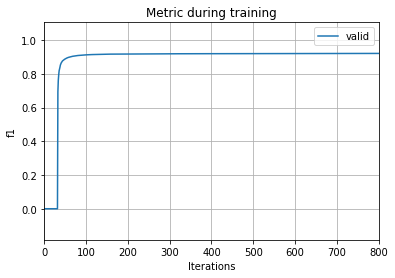

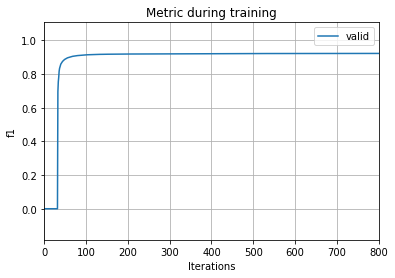

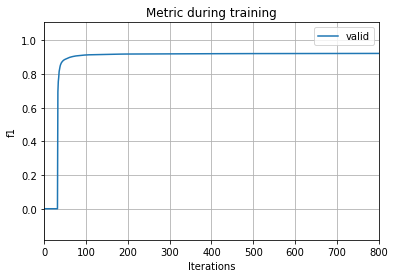

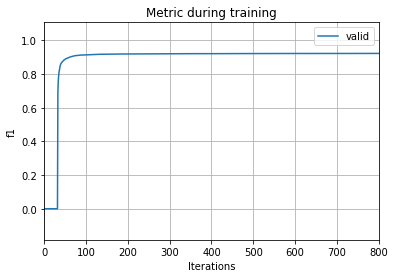

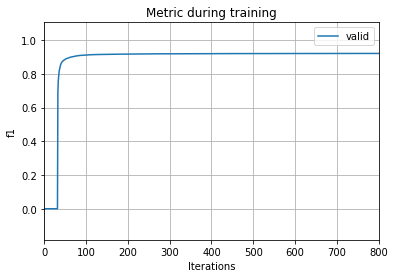

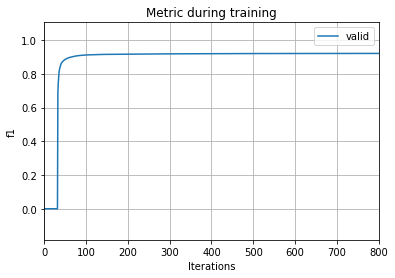

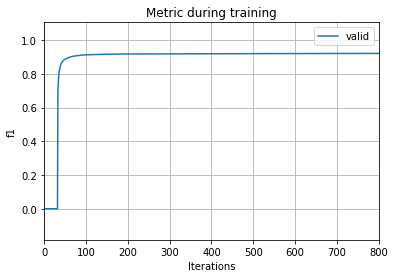

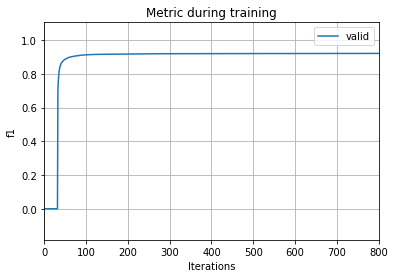

In [8]:
import lightgbm as lgb
from random import randint

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_boost_round':800,
    'num_leaves' : 1024,
    #'max_depth':32,
   # 'min_data_in_leaf':64,
    #'feature_fraction': 0.64, 
    #'bagging_fraction': 0.8, 
    #'bagging_freq':1,
    #'tree_learner':'voting',
    #'boosting_type' : 'dart',
    'metric': 'binary_logloss',
    'num_threads':8
    }

devide_clusters = False


def naklastry():
    pred = pd.DataFrame({'c':test2_c,'target':test2_c})

    for c in labels:
        xc_train=x_train[train_c==c]
        yc_train=y_train[train_c==c].y.values
        xc_test=x_test[test2_c==c]
        if len(xc_test)==0:
            continue
        print(len(xc_train),len(xc_test))
        d_train = lgb.Dataset(xc_train, label=yc_train)
        clf = lgb.train(params, d_train)
        
        #Prediction
        def add(row,c):
            if row['c']==c:
                return target.pop(0)
            else:
                return row.target
            
        target=list(clf.predict(xc_test))
        pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
                 
        print('done:',c)
    return pred.target.values

def jedna(t = False,seed=0):
    from sklearn.model_selection import train_test_split
    
    X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train.y.values, test_size=0.2, random_state=seed)
    
    d_train = lgb.Dataset(X_train, label=Y_train)
    d_valid = lgb.Dataset(X_val, label=Y_val)
    
    from sklearn.metrics import f1_score
    def lgb_f1_score(y_hat, data):
        y_true = data.get_label()
        y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
        return 'f1', f1_score(y_true, y_hat), True
    
    #Learning
    evals_result = {}    
    params['seed']=seed
    clf = lgb.train(params, d_train,valid_sets=[d_valid], valid_names=['valid'],feval=lgb_f1_score,evals_result=evals_result)   
    lgb.plot_metric(evals_result, metric='f1')
    
    #Prediction
    target=list(clf.predict(x_test))
    if t==True:
        target2=list(clf.predict(x_train))
        return target, target2
    return target, f1_score(Y_val,np.round(clf.predict(X_val)))

size = 8

city_lgbm_proba = []
city_lgbm_score = []
seeds = []
for i in range(size):
    s = randint(0,2**32 - 1)
    seeds.append(s)
    proba, score = jedna(t=False,seed=s)
    city_lgbm_proba.append(proba)
    city_lgbm_score.append(score)
print(seeds)

In [49]:

best = pd.read_csv('./output/best.csv').target.values
sum = 0
for i in range(size):
    sum += city_lgbm_score[i]
pred=pd.DataFrame()

sum += 1
pred['target']=best/sum
for i in range(size):
    pred[str(i)]=city_lgbm_proba[i]
    pred[str(i)]=pred[str(i)]*city_lgbm_score[i]/sum
 
    
for i in range(size):
    pred['target']=pred['target']+pred[str(i)]
pred=pred['target'].values


In [73]:

city=pd.DataFrame()
for i in range(size):
    city[str(i)]=np.round(city_lgbm_proba[i])
city[str(size)]=best
city['target']=city['0']
for i in range(1,size+1):
    city['target']=city['target']+city[str(i)]

def fnc(x):
    if x>=5:
        return 1
    else:
        return 0
city['target']=[fnc(x) for x in city.target.values]
city[:20]

,0,1,2,3,4,5,6,7,8,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0


In [74]:

X = test2['x_entry'].values 
Y = test2['y_entry'].values

def score(x):
    if x>=0.5:
        return 1
    else:
        return 0

city_proba_proba=[c_proba[c_proba.c==x]['proba'].values[0] for x in test2_c]  

city_sqrt = [within_measure(x, y) for x,y in zip(X,Y)]
city_proba= [score(x) for x in city_proba_proba]
#city_lgbm = [score(x) for x in pred]
city_lgbm = city.target.values
if devide_clusters:
    city_lgbm_c=[score(x) for x in city_lgbm_c_proba]


In [75]:
import statistics

if devide_clusters:
#city = [score(statistics.mean(k)) for k in zip(city_lgbm_c_proba,city_lgbm_proba)]
    city = [score(statistics.mean(k)) for k in zip(city_lgbm_c,city_lgbm)]


submission= pd.DataFrame()
trajectory_id = test2['trajectory_id']
submission['id']=trajectory_id 
submission['target'] = city_lgbm
submission.to_csv('./output/class/blended_5.csv',index=False)    

if devide_clusters:
    submission['target'] = city_lgbm_c
    submission.to_csv('./output/class/lgbm_c.csv',index=False)    

    submission['target'] = city
    submission.to_csv('./output/class/city.csv',index=False)    

In [76]:
def plotmap(ycity,title):
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)

    df=test2[['x_entry','y_entry']]
    df['sqrt']=city_sqrt
    df['target']=ycity
    df=df[df.sqrt==0]
    leg=['Outside','City']
    # Plot
    for data in [df[df.target==1]]:
        ax.scatter(data.x_entry.values, data.y_entry.values,c='r',s=10, alpha=0.5,label=leg.pop(0))

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=title)
    ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
    plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


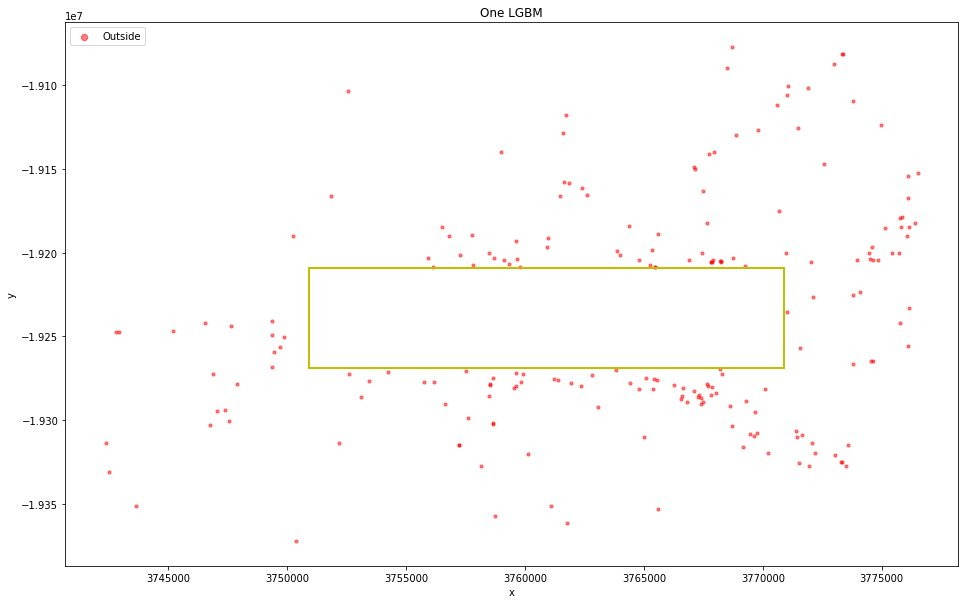

In [77]:
plotmap(city_lgbm,'One LGBM')

In [15]:
if devide_clusters:
    plotmap(city_lgbm_c,'Clusters LGBM')

In [16]:
if devide_clusters:
    plotmap(city,'Submission outside the sqrt')